# Unsupervised Learning

Unsupervised learning adalah cabang dari machine learning di mana model dilatih pada data tanpa label. Tujuan utama dari unsupervised learning adalah untuk menemukan pola atau struktur tersembunyi dalam data.

Pada intinya, unsupervised learning tidak punya label atau target output yang jelas, sehingga model harus menemukan pola atau struktur dalam data secara mandiri.

## Teknik-teknik Unsupervised Learning

1. **Clustering**: Teknik ini digunakan untuk mengelompokkan data ke dalam kelompok-kelompok berdasarkan kesamaan fitur. Contoh algoritma: K-Means, Hierarchical Clustering, DBSCAN.

2. **Dimensionality Reduction**: Teknik ini digunakan untuk mengurangi jumlah fitur dalam dataset sambil mempertahankan informasi penting. Contoh algoritma: PCA, t-SNE, Autoencoders.

3. **Association Rule Learning**: Teknik ini digunakan untuk menemukan hubungan atau aturan antara variabel dalam dataset. Contoh algoritma: Apriori, Eclat.

## Contoh Penerapan Unsupervised Learning

- **Customer Segmentation**: Mengelompokkan pelanggan berdasarkan perilaku pembelian mereka untuk strategi pemasaran yang lebih efektif.
- **Anomaly Detection**: Mendeteksi transaksi keuangan yang mencurigakan atau tidak biasa.
- **Dimensionality Reduction**: Mengurangi jumlah fitur dalam dataset besar untuk visualisasi atau pemrosesan lebih lanjut.
- **Market Basket Analysis**: Menemukan pola pembelian produk yang sering terjadi bersama-sama di toko.

# 1. Clustering

Clustering adalah teknik unsupervised learning yang digunakan untuk mengelompokkan data ke dalam kelompok-kelompok berdasarkan kesamaan fitur. Tujuan utama dari clustering adalah untuk menemukan struktur atau pola dalam data tanpa adanya label atau target output yang jelas.

## Algoritma Clustering

### 1.1 K-Means
K-Means adalah algoritma clustering yang membagi data menjadi K kelompok berdasarkan jarak Euclidean. Proses K-Means melibatkan beberapa langkah:
1. **Inisialisasi**: Memilih K titik pusat (centroid) secara acak.
2. **Penugasan**: Menugaskan setiap data ke centroid terdekat.
3. **Pembaruan**: Menghitung ulang posisi centroid berdasarkan rata-rata data yang ditugaskan ke masing-masing kelompok.
4. **Iterasi**: Mengulangi proses penugasan dan pembaruan hingga konvergensi (centroid tidak berubah).

### 1.2 Hierarchical Clustering
Hierarchical Clustering adalah metode yang membangun hirarki kelompok dengan menggabungkan atau memisahkan kelompok berdasarkan jarak antar data. Ada dua pendekatan utama:
- **Agglomerative**: Memulai dengan setiap data sebagai kelompok terpisah dan menggabungkan kelompok yang paling dekat secara iteratif.
- **Divisive**: Memulai dengan semua data dalam satu kelompok dan memisahkan kelompok secara iteratif.

### 1.3 DBSCAN
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah algoritma clustering yang mengelompokkan data berdasarkan kepadatan. DBSCAN bekerja dengan dua parameter utama:
- **Epsilon (ε)**: Jarak maksimum antara dua titik untuk dianggap sebagai tetangga.
- **MinPts**: Jumlah minimum titik yang diperlukan untuk membentuk sebuah cluster.

Keunggulan DBSCAN:
- Dapat menemukan cluster dengan bentuk yang tidak beraturan
- Dapat menangani outlier dengan baik
- Tidak perlu menentukan jumlah cluster di awal

## Praktik: K-Means Clustering

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Style
plt.style.use('seaborn-v0_8')

In [2]:
# Dataset
cust = pd.read_csv('Customer.csv')
cust

,Income,Spending,Savings
0,3.149014e+06,7.756989e+05,3.100180e+05
1,2.958521e+06,6.077835e+05,2.656476e+05
2,3.194307e+06,7.869606e+05,3.097838e+05
3,3.456909e+06,8.355638e+05,3.434638e+05
4,2.929754e+06,7.413435e+05,3.039088e+05
...,...,...,...
595,1.484700e+07,4.066071e+06,2.849606e+06
596,1.491904e+07,3.997054e+06,2.936189e+06
597,1.470637e+07,4.082873e+06,2.840795e+06
598,1.486671e+07,4.033587e+06,3.215201e+06


In [3]:
# Model Cluster
km = KMeans(n_clusters=5, random_state=42)
km.fit(cust)

  File "c:\Users\AUDIT-PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


KMeans(n_clusters=5, random_state=42)

In [4]:
# Eksrak hasil cluster
pd.Series(km.labels_).value_counts()

0    200
2    111
3    106
1     94
4     89
Name: count, dtype: int64

In [5]:
# Silhouette Score untuk berbagai K
sil_scores = {}
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(cust)
    sil_scores[k] = silhouette_score(cust, labels)
sil_scores

{2: np.float64(0.7794281642671467),
 3: np.float64(0.9260931235769567),
 4: np.float64(0.7213998764449953),
 5: np.float64(0.5507962142904389),
 6: np.float64(0.3686142429933463),
 7: np.float64(0.3410236322686706),
 8: np.float64(0.3098788311486258),
 9: np.float64(0.2983053800570507),
 10: np.float64(0.29789913431509274)}

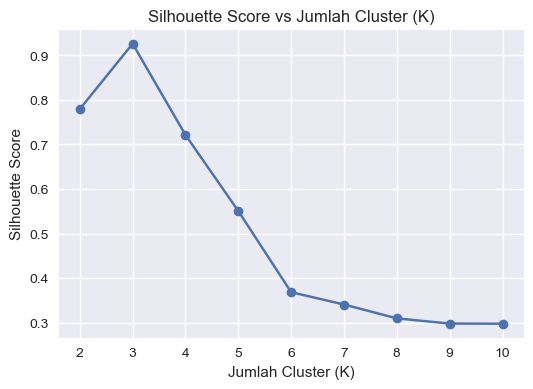

In [6]:
plt.figure(figsize=(6,4))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
plt.title('Silhouette Score vs Jumlah Cluster (K)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [7]:
# Model Cluster - Best K=3
km = KMeans(n_clusters=3, random_state=42)
labels = km.fit_predict(cust)

cust['Cluster'] = km.labels_
cust

,Income,Spending,Savings,Cluster
0,3.149014e+06,7.756989e+05,3.100180e+05,2
1,2.958521e+06,6.077835e+05,2.656476e+05,2
2,3.194307e+06,7.869606e+05,3.097838e+05,2
3,3.456909e+06,8.355638e+05,3.434638e+05,2
4,2.929754e+06,7.413435e+05,3.039088e+05,2
...,...,...,...,...
595,1.484700e+07,4.066071e+06,2.849606e+06,1
596,1.491904e+07,3.997054e+06,2.936189e+06,1
597,1.470637e+07,4.082873e+06,2.840795e+06,1
598,1.486671e+07,4.033587e+06,3.215201e+06,1


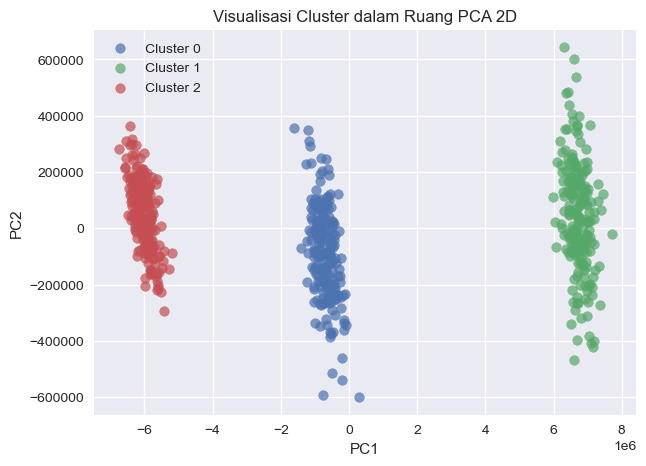

In [8]:
# Visual Dengan PCA
pca = PCA(n_components=2)
pca_comp = pca.fit_transform(cust)
cust['PC1'] = pca_comp[:, 0]
cust['PC2'] = pca_comp[:, 1]
plt.figure(figsize=(7,5))
for c in sorted(cust['Cluster'].unique()):
    subset = cust[cust['Cluster'] == c]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {c}', alpha=0.7)
plt.title('Visualisasi Cluster dalam Ruang PCA 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

### Analisis Cluster

**Challenge dari clustering adalah bagaimana kita bisa mendeskripsikan karakteristik dari masing-masing cluster.**

In [14]:
cust[cust['Cluster'] == 0]

,Income,Spending,Savings,Cluster,PC1,PC2
200,8.107336e+06,2.140743e+06,1.174371e+06,0,-6.296707e+05,-134911.924554
201,8.168235e+06,1.922593e+06,1.364398e+06,0,-5.884408e+05,-167655.193023
202,8.324915e+06,2.014418e+06,1.442284e+06,0,-4.003182e+05,-107397.599115
203,8.316141e+06,1.930659e+06,1.386274e+06,0,-4.424215e+05,-197101.445018
204,7.586699e+06,1.934826e+06,1.419526e+06,0,-1.120835e+06,72908.576908
...,...,...,...,...,...,...
395,7.859247e+06,1.957835e+06,1.178832e+06,0,-9.099128e+05,-167607.792469
396,7.486060e+06,2.269653e+06,1.374299e+06,0,-1.138005e+06,293558.150207
397,8.406162e+06,2.096126e+06,1.546899e+06,0,-2.801058e+05,-10199.902055
398,7.965638e+06,1.914323e+06,1.302495e+06,0,-7.945812e+05,-147285.167623


## Praktik: DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) mengelompokkan data berdasarkan kepadatan. Proses DBSCAN melibatkan beberapa langkah:

1. Memulai dengan titik acak yang belum dikunjungi.
2. Menemukan semua tetangga dari titik tersebut dalam jarak ε.
3. Jika jumlah tetangga ≥ MinPts, maka titik tersebut menjadi bagian dari cluster.
4. Mengulangi proses untuk setiap tetangga yang belum dikunjungi.
5. Jika sebuah titik tidak memiliki cukup tetangga, maka dianggap sebagai outlier (noise).

### Contoh Penerapan DBSCAN
- **Deteksi Anomali**: Mendeteksi transaksi keuangan yang mencurigakan sebagai outlier.
- **Segmentasi Pelanggan**: Mengelompokkan pelanggan berdasarkan perilaku pembelian, bahkan dengan bentuk cluster yang tidak beraturan.
- **Analisis Geospasial**: Mengidentifikasi area dengan kepadatan tinggi seperti pusat kota atau area komersial.

# 2. Dimensionality Reduction

Dimensionality reduction adalah teknik dalam machine learning yang digunakan untuk mengurangi jumlah fitur atau variabel dalam dataset sambil mempertahankan informasi penting. Teknik ini sangat berguna ketika bekerja dengan dataset besar yang memiliki banyak fitur.

**Manfaat Dimensionality Reduction:**
- Mengurangi kompleksitas model
- Meningkatkan kinerja dan kecepatan pelatihan
- Memudahkan visualisasi data
- Mengatasi masalah overfitting

## Metode Dimensionality Reduction

### 2.1 Principal Component Analysis (PCA)
PCA adalah teknik statistik yang mengubah data asli menjadi sekumpulan variabel baru yang disebut komponen utama. Komponen utama diurutkan berdasarkan variansnya, sehingga komponen pertama menangkap sebagian besar varians dalam data.

**Langkah-langkah PCA:**
1. Standarisasi data (rata-rata nol, varians satu)
2. Menghitung matriks kovarians
3. Menghitung nilai eigen dan vektor eigen
4. Memilih komponen utama berdasarkan nilai eigen tertinggi
5. Memproyeksikan data ke ruang komponen utama

**Analogi**: PCA seperti mengambil foto pemandangan yang kompleks dan mengubahnya menjadi sketsa sederhana yang masih menangkap esensi pemandangan tersebut.

### 2.2 t-SNE (t-Distributed Stochastic Neighbor Embedding)
t-SNE adalah teknik non-linear yang digunakan untuk visualisasi data berdimensi tinggi dalam ruang 2D atau 3D. t-SNE mempertahankan struktur lokal data, sangat berguna untuk mengidentifikasi pola atau kelompok dalam data.

### 2.3 Autoencoders
Autoencoders adalah jenis jaringan saraf yang dirancang untuk belajar representasi yang lebih rendah dari data input. Terdiri dari:
- **Encoder**: Mengurangi dimensi data
- **Decoder**: Merekonstruksi data asli dari representasi yang lebih rendah

## Contoh Penerapan PCA
- **Pengurangan Dimensi Fitur**: Dalam dataset citra wajah dengan ribuan piksel, PCA dapat mengurangi jumlah fitur menjadi beberapa komponen utama.
- **Pengenalan Pola**: Dalam pengenalan tulisan tangan, PCA membantu mengidentifikasi pola tulisan.
- **Visualisasi Data**: PCA dapat memproyeksikan data berdimensi tinggi ke dalam ruang 2D atau 3D untuk memudahkan visualisasi.

# Latihan Praktik Unsupervised Learning

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [31]:
# Load Dataset
df = pd.read_csv('Data Cluster - Latihan.csv')
df.head()

,MonthlySpending,TenureMonths,NumProducts,AppUsageHours,SupportTickets,LatePayments,DiscountLevel,SatisfactionScore
0,1.972488e+06,49.546299,4.0,36.842251,0.0,0.0,0.000000,8.507197
1,1.976526e+06,49.627680,4.0,27.671351,0.0,0.0,0.000000,8.437712
2,1.973409e+06,47.647573,4.0,26.160117,0.0,0.0,10.671696,8.895254
3,1.969987e+06,50.842319,4.0,26.822201,0.0,0.0,2.331756,8.994472
4,8.403421e+05,22.772844,3.0,27.621208,2.0,0.0,9.108329,6.956104


## EDA (Exploratory Data Analysis)

In [32]:
# Info Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MonthlySpending    1000 non-null   float64
 1   TenureMonths       1000 non-null   float64
 2   NumProducts        1000 non-null   float64
 3   AppUsageHours      1000 non-null   float64
 4   SupportTickets     1000 non-null   float64
 5   LatePayments       1000 non-null   float64
 6   DiscountLevel      1000 non-null   float64
 7   SatisfactionScore  1000 non-null   float64
dtypes: float64(8)
memory usage: 62.6 KB


In [33]:
# Statistik Deskriptif
df.describe()

,MonthlySpending,TenureMonths,NumProducts,AppUsageHours,SupportTickets,LatePayments,DiscountLevel,SatisfactionScore
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.056940e+06,25.796454,2.931000,19.781390,1.836000,0.618000,11.885264,7.290571
std,7.039965e+05,17.394885,1.211489,9.447303,1.844046,0.796687,7.797561,1.934973
min,1.583841e+05,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.879456
25%,3.324627e+05,7.982939,2.000000,12.713460,0.000000,0.000000,5.757794,5.619500
50%,8.949083e+05,23.646580,3.000000,19.739332,1.000000,0.000000,10.721511,7.705623
75%,1.966442e+06,46.347676,4.000000,27.132672,3.000000,1.000000,17.826055,8.898843
max,2.153843e+06,54.801541,5.000000,43.240720,8.000000,4.000000,36.273236,10.000000


In [34]:
# Cek Missing Values
df.isnull().sum()

MonthlySpending      0
TenureMonths         0
NumProducts          0
AppUsageHours        0
SupportTickets       0
LatePayments         0
DiscountLevel        0
SatisfactionScore    0
dtype: int64

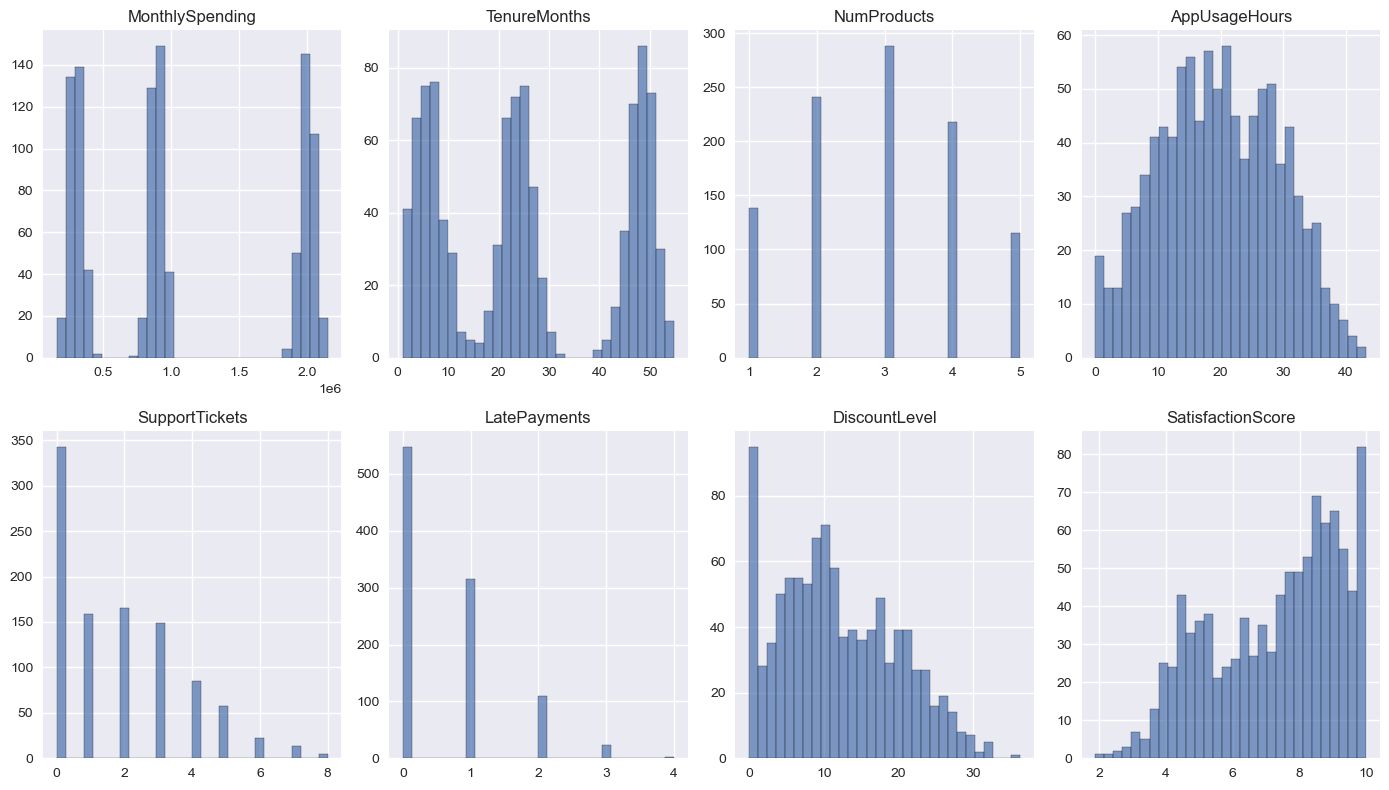

In [35]:
# Distribusi Data
fig, axes = plt.subplots(2, 4, figsize=(14, 8))
for i, col in enumerate(df.columns):
    ax = axes[i // 4, i % 4]
    ax.hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    ax.set_title(col)
plt.tight_layout()
plt.show()

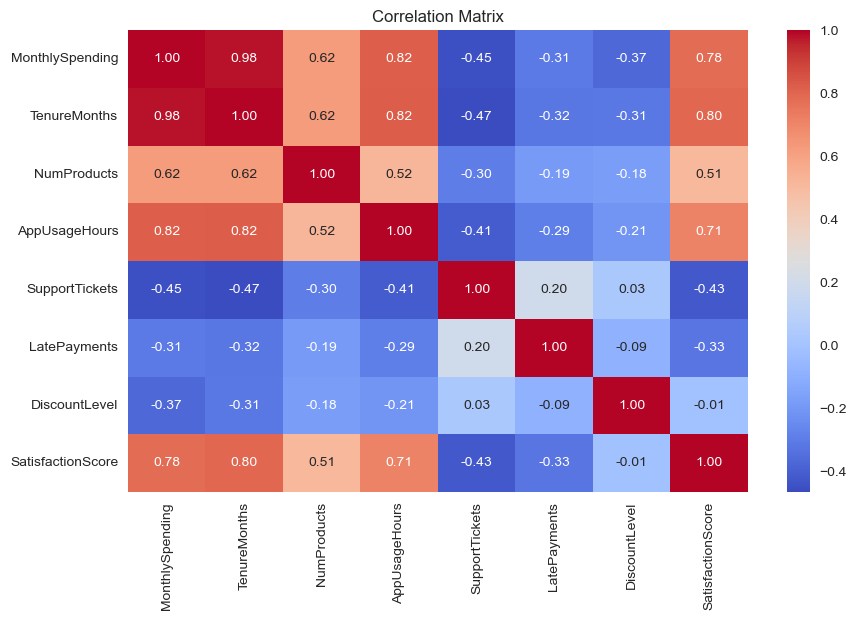

In [36]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Preprocessing

In [37]:
# Scaling Data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,MonthlySpending,TenureMonths,NumProducts,AppUsageHours,SupportTickets,LatePayments,DiscountLevel,SatisfactionScore
0,1.301152,1.366018,0.882826,1.806801,-0.996135,-0.7761,-1.524991,0.629071
1,1.306891,1.370699,0.882826,0.835573,-0.996135,-0.7761,-1.524991,0.593143
2,1.302461,1.256809,0.882826,0.675528,-0.996135,-0.7761,-0.155712,0.829721
3,1.297598,1.440561,0.882826,0.745645,-0.996135,-0.7761,-1.225805,0.881022
4,-0.307822,-0.173909,0.056983,0.830262,0.088979,-0.7761,-0.356307,-0.172940


## K-Means Clustering

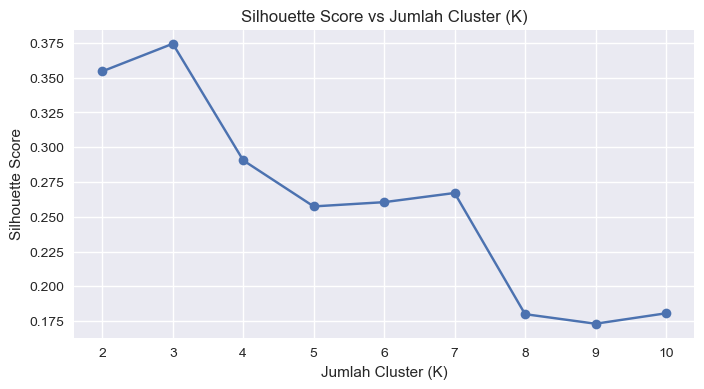

{2: np.float64(0.35457623555848544),
 3: np.float64(0.3744149546170372),
 4: np.float64(0.29054279222096874),
 5: np.float64(0.25744029940537244),
 6: np.float64(0.2605031807264274),
 7: np.float64(0.26709394631929273),
 8: np.float64(0.17997549618281414),
 9: np.float64(0.1730973270296147),
 10: np.float64(0.18059772972888977)}

In [38]:
# Menentukan Optimal K dengan Silhouette Score
sil_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    sil_scores[k] = silhouette_score(df_scaled, labels)

plt.figure(figsize=(8, 4))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
plt.title('Silhouette Score vs Jumlah Cluster (K)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

sil_scores

In [47]:
# Optimal K - K-Means
optimal_k = max(sil_scores, key=lambda k: sil_scores[k])
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

pd.Series(df['Cluster_KMeans']).value_counts()

Cluster_KMeans
2    339
0    337
1    324
Name: count, dtype: int64

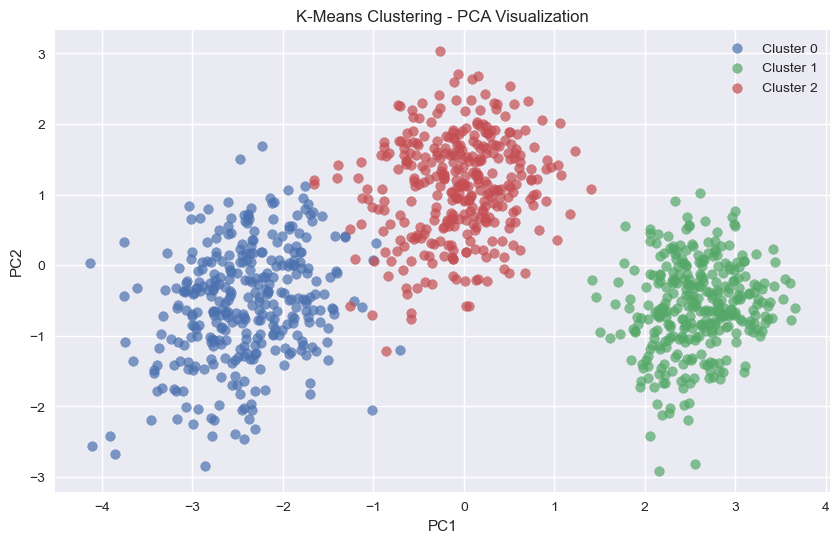

In [48]:
# Visualisasi K-Means dengan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
for c in sorted(df['Cluster_KMeans'].unique()):
    subset = df[df['Cluster_KMeans'] == c]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {c}', alpha=0.7)
plt.title('K-Means Clustering - PCA Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

### Kesimpulan
- Cluster 0 (337): Low-Value At-Risk Customers - Spending rendah (309K), tenure pendek (6 bulan), sedikit produk (2), support tickets tinggi (3), late payments tinggi (1), satisfaction rendah (5)
- Cluster 1 (324): High-Value Loyal Customers - Spending tinggi (2M), tenure panjang (48 bulan), banyak produk (4), penggunaan app tinggi (30 jam), support tickets rendah (0.9), satisfaction tinggi (9)
- Cluster 2 (339) 9	Mid-Value Discount Seekers - Spending menengah (895K), tenure menengah (24 bulan), produk menengah (3), discount level tinggi (20%), satisfaction baik (~8)


In [41]:
# Kode: profiling cluster
cluster_profile = df.groupby('Cluster_KMeans').agg(['count','mean','median','std']).T
# Lebih ringkas:
summary = df.groupby('Cluster_KMeans').agg({
    'MonthlySpending': ['mean','median'],
    'TenureMonths': ['mean','median'],
    'NumProducts': ['mean','median'],
    'AppUsageHours': ['mean','median'],
    'SupportTickets': ['mean','median'],
    'LatePayments': ['mean','median'],
    'DiscountLevel': ['mean','median'],
    'SatisfactionScore': ['mean','median'],
})
display(summary)

# Untuk deskripsi ringkas (contoh label bisnis)
for c in sorted(df['Cluster_KMeans'].unique()):
    row = summary.loc[c]
    print(f"\nCluster {c} summary:")
    print(row)


MonthlySpending               TenureMonths             \
                          mean        median         mean     median   
Cluster_KMeans                                                         
0                 3.089721e+05  2.994234e+05     6.361702   6.033286   
1                 2.004424e+06  2.003048e+06    48.206435  48.354058   
2                 8.949341e+05  8.958676e+05    23.698159  23.772147   

               NumProducts        AppUsageHours            SupportTickets  \
                      mean median          mean     median           mean   
Cluster_KMeans                                                              
0                 2.005935    2.0     10.259030  10.204624       3.142433   
1                 3.907407    4.0     29.615367  29.724334       0.898148   
2                 2.917404    3.0     19.848725  19.836034       1.433628   

                      LatePayments        DiscountLevel             \
               median         mean median          mean     median   
Cluster_KMeans                                                       
0                 3.0     1.053412    1.0     10.004214  10.023005   
1                 0.0     0.367284    0.0      5.155619   4.828700   
2                 1.0     0.424779    0.0     20.187091  20.087277   

               SatisfactionScore            
                            mean    median  
Cluster_KMeans                              
0                       5.012956  4.927171  
1                       8.950854  9.010195  
2                       7.967929  8.003415


Cluster 0 summary:
MonthlySpending    mean      308972.087191
                   median    299423.367940
TenureMonths       mean           6.361702
                   median         6.033286
NumProducts        mean           2.005935
                   median         2.000000
AppUsageHours      mean          10.259030
                   median        10.204624
SupportTickets     mean           3.142433
                   median         3.000000
LatePayments       mean           1.053412
                   median         1.000000
DiscountLevel      mean          10.004214
                   median        10.023005
SatisfactionScore  mean           5.012956
                   median         4.927171
Name: 0, dtype: float64

Cluster 1 summary:
MonthlySpending    mean      2.004424e+06
                   median    2.003048e+06
TenureMonths       mean      4.820643e+01
                   median    4.835406e+01
NumProducts        mean      3.907407e+00
                   median    4.000000e

## DBSCAN Clustering

In [42]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [43]:
# DBSCAN Model
dbscan = DBSCAN(eps=0.8, min_samples=5)
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

pd.Series(df['Cluster_DBSCAN']).value_counts()

Cluster_DBSCAN
-1     503
 0      75
 5      71
 2      53
 3      39
 13     35
 1      19
 16     19
 14     18
 11     17
 19     15
 15     15
 9      14
 8      13
 6      11
 20     10
 4       9
 23      9
 7       8
 18      8
 12      7
 21      6
 10      6
 22      6
 17      5
 25      5
 24      4
Name: count, dtype: int64

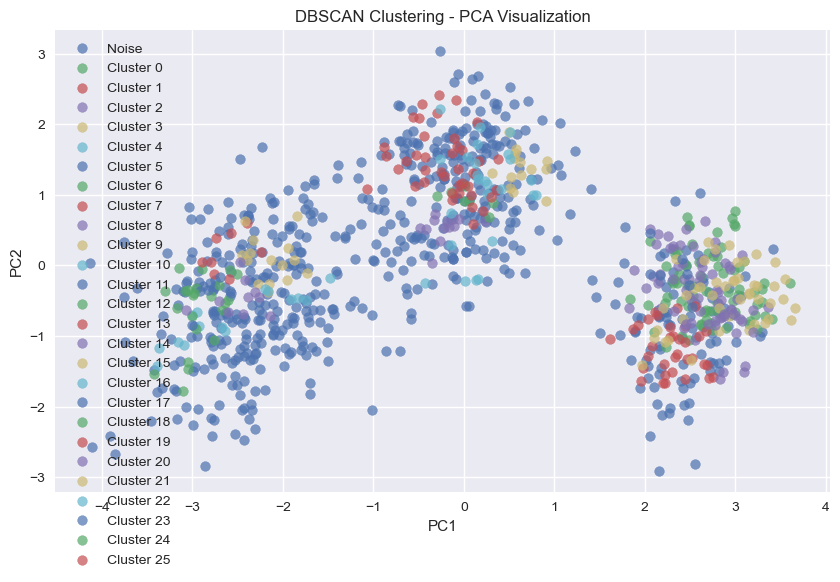

In [44]:
# Visualisasi DBSCAN dengan PCA
plt.figure(figsize=(10, 6))
for c in sorted(df['Cluster_DBSCAN'].unique()):
    subset = df[df['Cluster_DBSCAN'] == c]
    label = 'Noise' if c == -1 else f'Cluster {c}'
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=0.7)
plt.title('DBSCAN Clustering - PCA Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)
plt.show()

### Karakteristik Cluster

In [45]:
# Statistik per Cluster (K-Means)
cluster_cols = ['MonthlySpending', 'TenureMonths', 'NumProducts', 'AppUsageHours', 
                'SupportTickets', 'LatePayments', 'DiscountLevel', 'SatisfactionScore']
df.groupby('Cluster_KMeans')[cluster_cols].mean()

,MonthlySpending,TenureMonths,NumProducts,AppUsageHours,SupportTickets,LatePayments,DiscountLevel,SatisfactionScore
Cluster_KMeans,,,,,,,,
0,3.089721e+05,6.361702,2.005935,10.259030,3.142433,1.053412,10.004214,5.012956
1,2.004424e+06,48.206435,3.907407,29.615367,0.898148,0.367284,5.155619,8.950854
2,8.949341e+05,23.698159,2.917404,19.848725,1.433628,0.424779,20.187091,7.967929


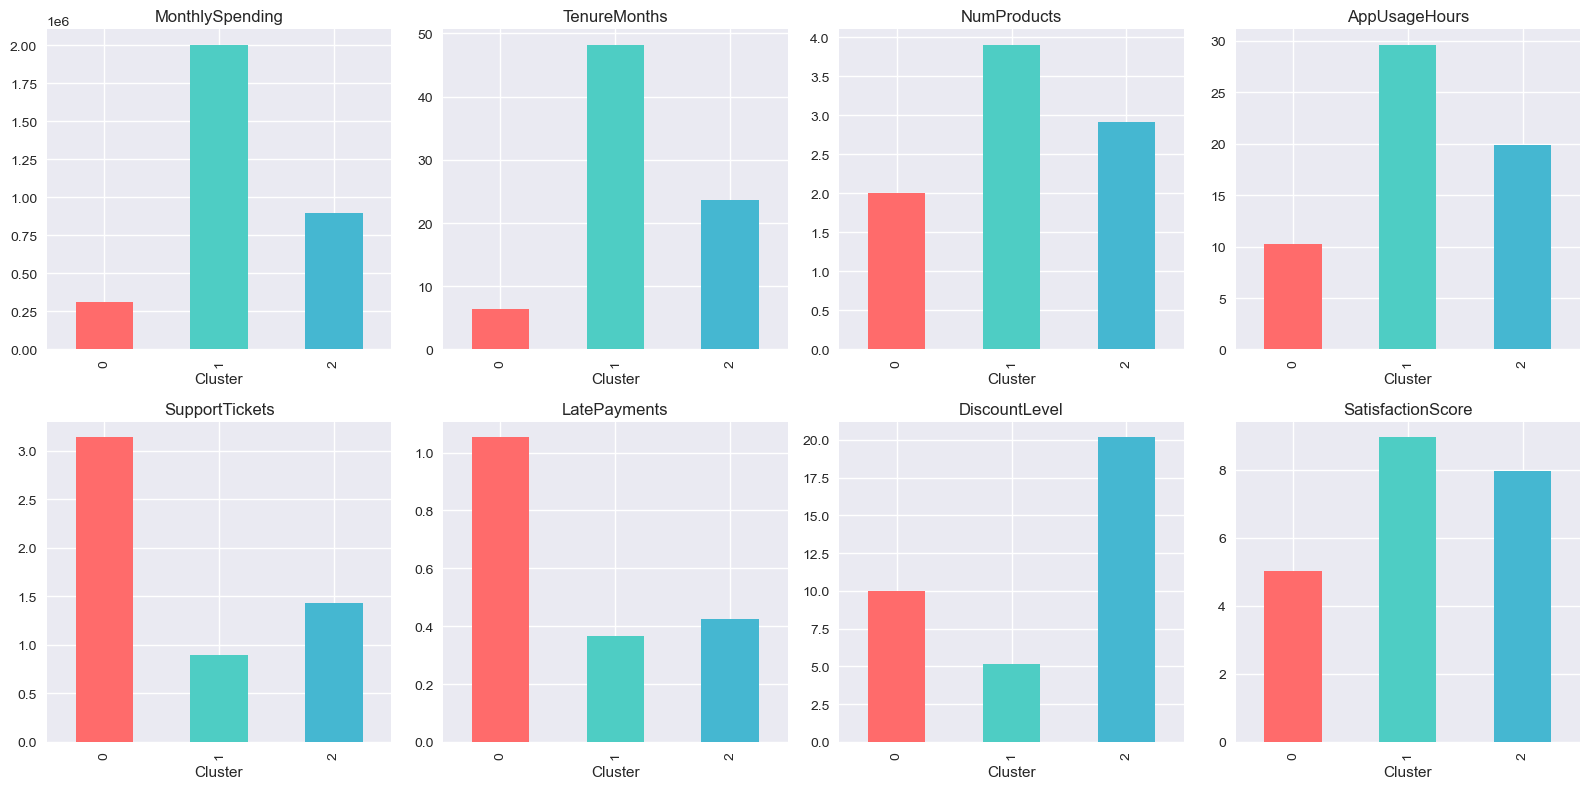

In [46]:
# Visualisasi Karakteristik Cluster
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, col in enumerate(cluster_cols):
    ax = axes[i // 4, i % 4]
    df.groupby('Cluster_KMeans')[col].mean().plot(kind='bar', ax=ax, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax.set_title(col)
    ax.set_xlabel('Cluster')
plt.tight_layout()
plt.show()

### Kesimpulan DBSCAN
DBSCAN menghasilkan 26 cluster dengan karakteristik sebagai berikut:
- Noise (-1): 503 data points dianggap sebagai outlier/noise (tidak masuk cluster manapun)
- Cluster terbesar: Cluster 0 (75), Cluster 5 (71), Cluster 2 (53)
- Banyak cluster kecil dengan jumlah anggota sedikit (4-20 data points)

### Interpretasi
- DBSCAN kurang cocok untuk dataset ini karena menghasilkan terlalu banyak cluster kecil dan banyak noise
- Parameter eps=0.8 dan min_samples=5 mungkin perlu di-tuning
- K-Means lebih sesuai untuk dataset ini karena menghasilkan cluster yang lebih seimbang dan mudah diinterpretasi

## Hybrid Clustering: K-Means + DBSCAN

Pendekatan hybrid menggabungkan kelebihan dari K-Means dan DBSCAN:
- **K-Means**: Menghasilkan cluster yang seimbang dan mudah diinterpretasi
- **DBSCAN**: Baik dalam mendeteksi outlier/noise

**Strategi:**
1. Gunakan K-Means untuk clustering utama
2. Gunakan DBSCAN untuk mendeteksi outlier dalam setiap cluster
3. Atau: Gunakan DBSCAN untuk filter outlier terlebih dahulu, lalu K-Means untuk clustering

### Metode 1: DBSCAN untuk Filter Outlier → K-Means untuk Clustering

In [49]:
# Step 1: Gunakan DBSCAN untuk mendeteksi outlier
# Parameter yang lebih longgar untuk menangkap lebih banyak data sebagai inlier
dbscan_filter = DBSCAN(eps=1.5, min_samples=3)
outlier_labels = dbscan_filter.fit_predict(df_scaled)

# Identifikasi outlier (label = -1)
outlier_mask = outlier_labels == -1
inlier_mask = ~outlier_mask

print(f"Total Data: {len(df)}")
print(f"Inliers (bukan outlier): {inlier_mask.sum()}")
print(f"Outliers: {outlier_mask.sum()}")

Total Data: 1000
Inliers (bukan outlier): 980
Outliers: 20


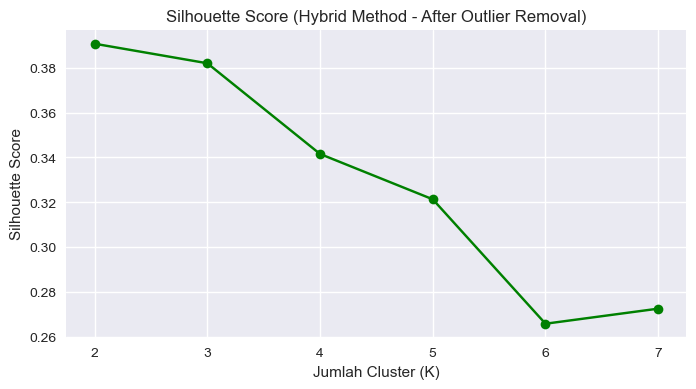

Silhouette Scores: {2: np.float64(0.39071493950654124), 3: np.float64(0.3820069301777728), 4: np.float64(0.3415712278165956), 5: np.float64(0.32135762229663456), 6: np.float64(0.26589700402443334), 7: np.float64(0.2726160791064973)}


In [50]:
# Step 2: K-Means hanya pada inliers
df_inliers = df_scaled[inlier_mask].copy()
df_inliers_original = df[inlier_mask].copy()

# Tentukan optimal K untuk inliers
sil_scores_hybrid = {}
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_inliers)
    sil_scores_hybrid[k] = silhouette_score(df_inliers, labels)

plt.figure(figsize=(8, 4))
plt.plot(list(sil_scores_hybrid.keys()), list(sil_scores_hybrid.values()), marker='o', color='green')
plt.title('Silhouette Score (Hybrid Method - After Outlier Removal)')
plt.xlabel('Jumlah Cluster (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

print("Silhouette Scores:", sil_scores_hybrid)

In [51]:
# Step 3: Apply K-Means dengan optimal K pada inliers
optimal_k_hybrid = max(sil_scores_hybrid, key=lambda k: sil_scores_hybrid[k])
print(f"Optimal K untuk Hybrid Method: {optimal_k_hybrid}")

kmeans_hybrid = KMeans(n_clusters=optimal_k_hybrid, random_state=42)
df_inliers_original['Cluster_Hybrid'] = kmeans_hybrid.fit_predict(df_inliers)

# Buat kolom hybrid untuk semua data (outlier diberi label -1)
df['Cluster_Hybrid'] = -1  # Default: outlier
df.loc[inlier_mask, 'Cluster_Hybrid'] = df_inliers_original['Cluster_Hybrid'].values

print("\nDistribusi Cluster Hybrid:")
print(pd.Series(df['Cluster_Hybrid']).value_counts().sort_index())

Optimal K untuk Hybrid Method: 2

Distribusi Cluster Hybrid:
Cluster_Hybrid
-1     20
 0    326
 1    654
Name: count, dtype: int64


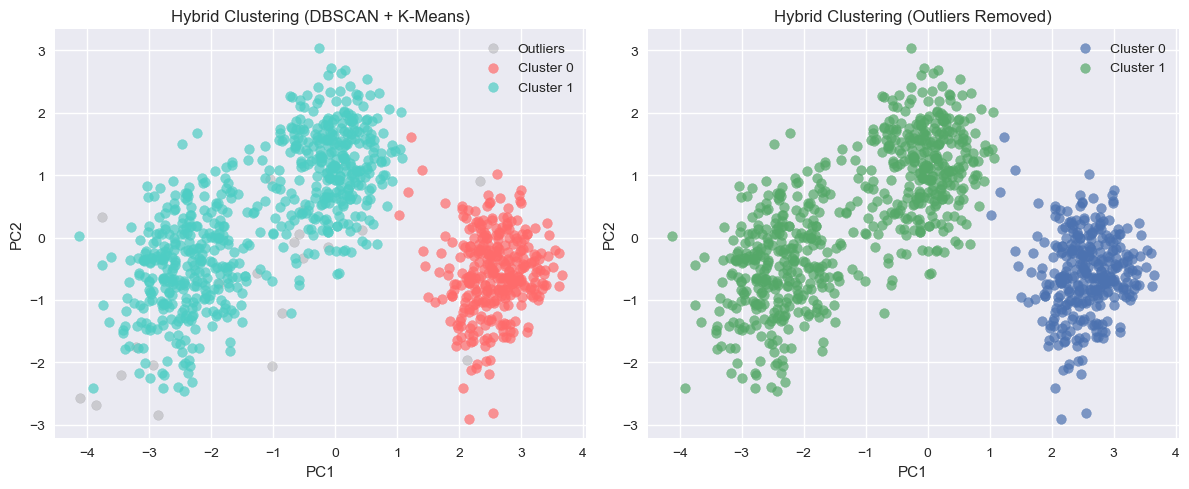

In [52]:
# Visualisasi Hybrid Clustering
plt.figure(figsize=(12, 5))

# Plot 1: Semua data dengan outlier
plt.subplot(1, 2, 1)
colors = ['gray', '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
for c in sorted(df['Cluster_Hybrid'].unique()):
    subset = df[df['Cluster_Hybrid'] == c]
    label = 'Outliers' if c == -1 else f'Cluster {c}'
    color = colors[c + 1] if c + 1 < len(colors) else 'purple'
    alpha = 0.3 if c == -1 else 0.7
    plt.scatter(subset['PC1'], subset['PC2'], label=label, alpha=alpha, c=color)
plt.title('Hybrid Clustering (DBSCAN + K-Means)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)

# Plot 2: Hanya inliers (cluster yang valid)
plt.subplot(1, 2, 2)
df_no_outlier = df[df['Cluster_Hybrid'] != -1]
for c in sorted(df_no_outlier['Cluster_Hybrid'].unique()):
    subset = df_no_outlier[df_no_outlier['Cluster_Hybrid'] == c]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Cluster {c}', alpha=0.7)
plt.title('Hybrid Clustering (Outliers Removed)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Profil Cluster Hybrid (Mean):


,MonthlySpending,TenureMonths,NumProducts,AppUsageHours,SupportTickets,LatePayments,DiscountLevel,SatisfactionScore
Cluster_Hybrid,,,,,,,,
0,1.994422e+06,47.970735,3.914110,29.475935,0.883436,0.361963,5.257138,8.954232
1,5.986894e+05,14.941831,2.454128,15.015763,2.243119,0.703364,15.130616,6.478534


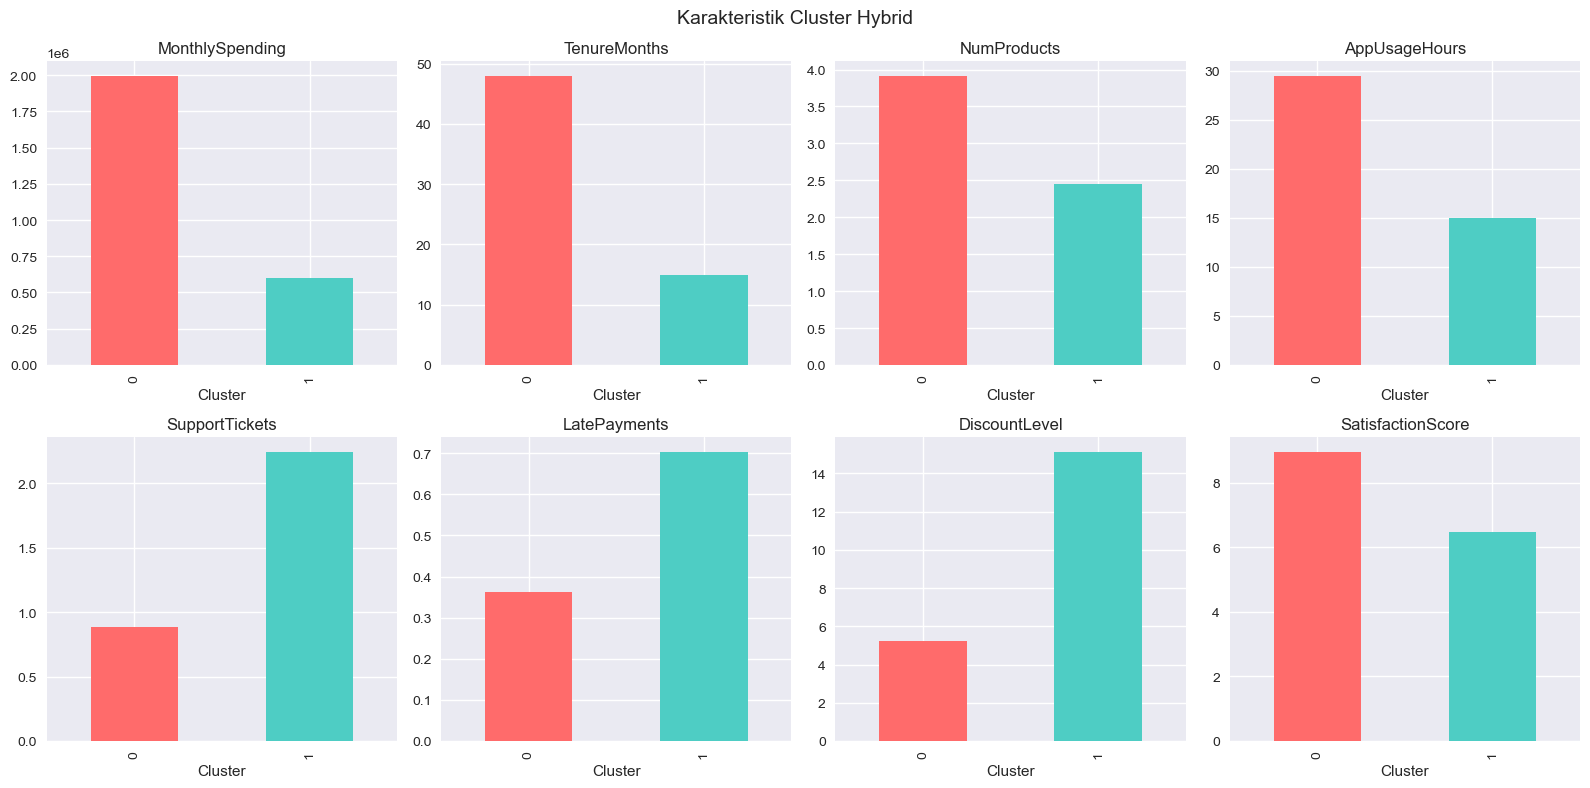

In [53]:
# Karakteristik Cluster Hybrid (tanpa outlier)
cluster_cols = ['MonthlySpending', 'TenureMonths', 'NumProducts', 'AppUsageHours', 
                'SupportTickets', 'LatePayments', 'DiscountLevel', 'SatisfactionScore']

df_valid = df[df['Cluster_Hybrid'] != -1]
hybrid_profile = df_valid.groupby('Cluster_Hybrid')[cluster_cols].mean()
print("Profil Cluster Hybrid (Mean):")
display(hybrid_profile)

# Visualisasi karakteristik
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, col in enumerate(cluster_cols):
    ax = axes[i // 4, i % 4]
    df_valid.groupby('Cluster_Hybrid')[col].mean().plot(kind='bar', ax=ax, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax.set_title(col)
    ax.set_xlabel('Cluster')
plt.suptitle('Karakteristik Cluster Hybrid', fontsize=14)
plt.tight_layout()
plt.show()

In [54]:
# Analisis Outlier
df_outliers = df[df['Cluster_Hybrid'] == -1]
print(f"Jumlah Outlier: {len(df_outliers)}")
print("\nKarakteristik Outlier (Mean):")
display(df_outliers[cluster_cols].describe())

Jumlah Outlier: 20

Karakteristik Outlier (Mean):


,MonthlySpending,TenureMonths,NumProducts,AppUsageHours,SupportTickets,LatePayments,DiscountLevel,SatisfactionScore
count,2.000000e+01,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,7.607494e+05,19.301853,2.500000,17.596287,4.050000,2.000000,13.800706,6.726497
std,5.012189e+05,13.955292,1.277333,10.703616,2.684752,1.414214,8.534288,2.096906
min,2.213681e+05,1.885232,1.000000,0.000000,0.000000,0.000000,0.000000,1.879456
25%,3.442698e+05,7.037541,1.000000,9.942614,1.750000,0.750000,7.341721,5.838541
50%,8.476082e+05,21.352308,2.500000,16.241157,3.500000,2.000000,15.099178,7.637832
75%,9.089804e+05,26.288278,3.250000,22.285580,7.000000,3.000000,19.364164,8.100385
max,1.976327e+06,50.042297,5.000000,43.240720,8.000000,4.000000,29.793274,9.322167


In [55]:
# Perbandingan Silhouette Score: K-Means vs Hybrid
from sklearn.metrics import silhouette_score

# K-Means (semua data)
sil_kmeans_all = silhouette_score(df_scaled, df['Cluster_KMeans'])

# Hybrid (hanya inliers)
df_valid_scaled = df_scaled[df['Cluster_Hybrid'] != -1]
hybrid_labels = df.loc[df['Cluster_Hybrid'] != -1, 'Cluster_Hybrid']
sil_hybrid = silhouette_score(df_valid_scaled, hybrid_labels)

print("=" * 50)
print("PERBANDINGAN PERFORMA CLUSTERING")
print("=" * 50)
print(f"K-Means (semua data):")
print(f"  - Silhouette Score: {sil_kmeans_all:.4f}")
print(f"  - Jumlah Cluster: {df['Cluster_KMeans'].nunique()}")
print(f"  - Total Data: {len(df)}")
print()
print(f"Hybrid (DBSCAN + K-Means):")
print(f"  - Silhouette Score: {sil_hybrid:.4f}")
print(f"  - Jumlah Cluster: {df_valid['Cluster_Hybrid'].nunique()}")
print(f"  - Data dalam Cluster: {len(df_valid)}")
print(f"  - Outliers terdeteksi: {outlier_mask.sum()}")

PERBANDINGAN PERFORMA CLUSTERING
K-Means (semua data):
  - Silhouette Score: 0.3744
  - Jumlah Cluster: 3
  - Total Data: 1000

Hybrid (DBSCAN + K-Means):
  - Silhouette Score: 0.3907
  - Jumlah Cluster: 2
  - Data dalam Cluster: 980
  - Outliers terdeteksi: 20


### Kesimpulan Hybrid Clustering (DBSCAN + K-Means)

**Konsep Hybrid Clustering:**
Metode hybrid menggabungkan kelebihan dari dua algoritma:
- **DBSCAN**: Digunakan untuk mendeteksi dan memisahkan outlier/data anomali
- **K-Means**: Digunakan untuk clustering data yang sudah bersih dari outlier

**Hasil Analisis:**

**1. Outlier Detection:**
- DBSCAN (eps=1.5, min_samples=3) berhasil mengidentifikasi **20 outliers** dari 1000 data
- Outlier ini merepresentasikan pelanggan dengan perilaku unik/anomali yang perlu investigasi khusus

**2. Distribusi Cluster Hybrid:**
- Cluster -1 (Outliers): 20 data
- Cluster 0: 326 data
- Cluster 1: 654 data

**3. Karakteristik Cluster (setelah outlier removal):**

| Karakteristik | Cluster 0 | Cluster 1 |
|---------------|-----------|-----------|
| MonthlySpending | ~2M (Tinggi) | ~599K (Rendah) |
| TenureMonths | 48 bulan (Lama) | 15 bulan (Pendek) |
| NumProducts | 4 produk | 2.5 produk |
| AppUsageHours | 29.5 jam (Aktif) | 15 jam (Kurang aktif) |
| SupportTickets | 0.9 (Sedikit) | 2.2 (Banyak) |
| LatePayments | 0.4 (Jarang) | 0.7 (Lebih sering) |
| DiscountLevel | 5% (Rendah) | 15% (Tinggi) |
| SatisfactionScore | 9 (Sangat Puas) | 6.5 (Cukup) |

- **Cluster 0 - High-Value Loyal Customers (326)**: Spending sangat tinggi (~2M), tenure panjang (48 bulan), banyak produk (4), aktif menggunakan app (29 jam), jarang komplain (0.9 tiket), jarang telat bayar, tidak butuh diskon besar (5%), satisfaction sangat tinggi (9)

- **Cluster 1 - Low-Value At-Risk Customers (654)**: Spending rendah (~599K), tenure pendek (15 bulan), sedikit produk (2.5), kurang aktif di app (15 jam), sering komplain (2.2 tiket), lebih sering telat bayar, butuh diskon besar (15%), satisfaction cukup (6.5)

**4. Perbandingan Performa:**
- K-Means (semua data): Silhouette Score = 0.3744
- Hybrid (setelah outlier removal): Silhouette Score = **0.3907** (lebih baik!)
- Peningkatan Silhouette Score menunjukkan cluster yang lebih homogen

**5. Business Implications:**
- **Cluster 0 (High-Value Loyal)**: Fokus pada retention, upselling, program loyalty rewards
- **Cluster 1 (At-Risk)**: Fokus pada improvement satisfaction, customer engagement, reduce support tickets
- **Outliers (20 data)**: Investigasi lebih lanjut - bisa jadi fraud atau pelanggan dengan kebutuhan sangat spesifik